In [309]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
# carregar dados
def carrega_dados(nome_arquivo):
    return pd.read_csv(nome_arquivo)

In [311]:
def plot_balanceamento_classes(classe, titulo):
    classes, counts = np.unique(classe, return_counts=True)
    plt.bar(classes, counts)
    plt.xticks(classes)
    plt.xlabel('Classes')
    plt.ylabel('Número de amostras')
    plt.title(titulo)
    
    for i in range(len(classes)):
        plt.text(x = classes[i] - 0.05, y = counts[i] + 1, s = counts[i])
    
    plt.show()

In [312]:
# aplicar label encoding a uma lista de colunas
def aplica_label_encoding(df, lista_colunas):
    le = LabelEncoder()
    for coluna in lista_colunas:
        df[coluna] = le.fit_transform(df[coluna])
    return df

In [313]:
# # balancear classes com SMOTE
# def balanceamento_classes(X, y):
#     sm = SMOTE(random_state=42)
#     X_resampled, y_resampled = sm.fit_resample(X, y)
#     return X_resampled, y_resampled

In [314]:
# # normalizar dados
# def normalizar_dados(X):
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(X)

In [315]:
# carregar dados
df_treino = carrega_dados("datasets/train.csv")
df_teste = carrega_dados("datasets/test.csv")

In [316]:
print('dimensões:', df_treino.shape)
print('colunas:', df_treino.columns)

dimensões: (3333, 21)
colunas: Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


In [317]:
df_treino.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [318]:
# remover coluna desnecessária
# coluna de indice
colunas_deletar = ['Unnamed: 0']

# colunas com valores semelhantes
colunas_deletar = colunas_deletar + ['area_code', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
print('colunas que serão removidas:', colunas_deletar)

df_modificado = df_treino.drop(colunas_deletar, axis=1)
#df = df.drop(['Unnamed: 0'], axis=1)

colunas que serão removidas: ['Unnamed: 0', 'area_code', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']


In [319]:
print('dimensões:', df_modificado.shape)
print('tipos das variáveis:\n', df_modificado.dtypes)
df_modificado.head(3)

dimensões: (3333, 15)
tipos das variáveis:
 state                             object
account_length                     int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_eve_minutes                float64
total_eve_calls                    int64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
churn                             object
dtype: object


,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no


In [320]:
# aplicar técnica de label encoding as variaveis categoricas
# selecionar as variaveis categoricas
colunas_label_encoding = df_modificado.select_dtypes(include='object')
print('colunas modificadas:', colunas_label_encoding.columns)
# aplica label encoding
df_modificado = aplica_label_encoding(df_modificado, colunas_label_encoding.columns)
df_modificado.head(3)

colunas modificadas: Index(['state', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,16,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0


In [321]:
# Analisar correlação das demais variaveis com a variável alvo
variavel_alvo = df_modificado['churn']
df_sem_alvo = df_modificado.drop('churn', axis=1)

matriz_correlacao_alvo = df_sem_alvo.corrwith(variavel_alvo)
matriz_correlacao_alvo = matriz_correlacao_alvo.sort_values(ascending=False)

print(matriz_correlacao_alvo)

international_plan               0.259852
number_customer_service_calls    0.208750
total_day_minutes                0.205151
total_eve_minutes                0.092796
total_intl_minutes               0.068239
total_night_minutes              0.035493
total_day_calls                  0.018459
account_length                   0.016541
total_eve_calls                  0.009233
state                            0.007780
total_night_calls                0.006141
total_intl_calls                -0.052844
number_vmail_messages           -0.089728
voice_mail_plan                 -0.102148
dtype: float64


In [322]:
# removendo variáveis com baixa correlação
colunas_baixa_correlacao = ['total_eve_calls', 'state', 'total_night_calls']
print('colunas que serão removidas por terem baixa correlação:', colunas_baixa_correlacao)

df = df_modificado.drop(colunas_baixa_correlacao, axis=1)
print('dimensões:', df.shape)
df.head(3)

colunas que serão removidas por terem baixa correlação: ['total_eve_calls', 'state', 'total_night_calls']
dimensões: (3333, 12)


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,128,0,1,25,265.1,110,197.4,244.7,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,254.4,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,162.6,12.2,5,0,0


In [323]:
# criar mapa de correlação
df_sem_alvo = df.drop('churn', axis=1)

X = sm.add_constant(df_sem_alvo)

# Criando modelo de regressão linear
model = sm.OLS(df['churn'], X)

# Ajustando o modelo
results = model.fit()

# Calculando o VIF para cada variável
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                       features
0    92.789487                          const
1     1.003408                 account_length
2     1.007262             international_plan
3    11.887880                voice_mail_plan
4    11.886475          number_vmail_messages
5     1.003010              total_day_minutes
6     1.003472                total_day_calls
7     1.001910              total_eve_minutes
8     1.002149            total_night_minutes
9     1.004349             total_intl_minutes
10    1.002773               total_intl_calls
11    1.002223  number_customer_service_calls


In [324]:
# posteriormente testar remover as variáveis "voice_mail_plan" e "number_vmail_messages" para saber se melhora a acuracia do modelo
# removendo variáveis com alto indice VIF
# testando sem esta operação
# colunas_alto_vif = ['voice_mail_plan', 'number_vmail_messages']
# print('colunas que serão removidas por terem alto valor VIF:', colunas_alto_vif)

# df = df.drop(colunas_alto_vif, axis=1)
# print('dimensões:', df.shape)
# df.head(3)

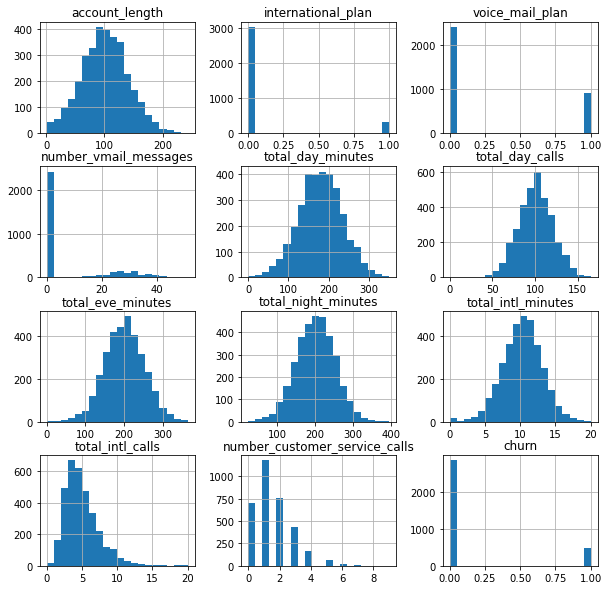

In [325]:
df.hist(bins=20, figsize=(10,10))
plt.show()

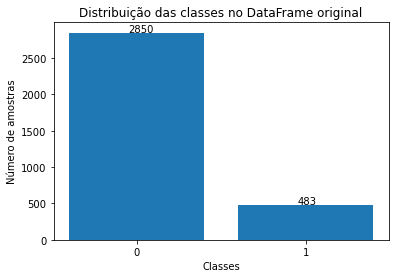

In [326]:
plot_balanceamento_classes(df['churn'], 'Distribuição das classes no DataFrame original')

In [327]:
# realizar o balanceamento de classes
X = df.drop('churn', axis=1)
y = df['churn']

# Aplique o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
x_balanceado, y_balanceado = smote.fit_resample(X, y)

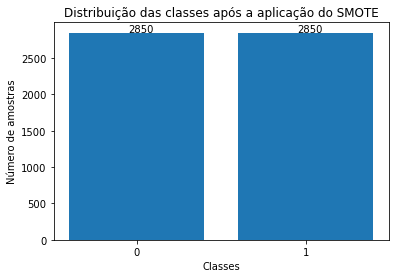

In [328]:
plot_balanceamento_classes(y_balanceado, 'Distribuição das classes após a aplicação do SMOTE')

In [329]:
x_balanceado.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

In [330]:
# seleciona as variáveis numéricas do conjunto de dados
colunas_numericas = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

# cria um objeto StandardScaler e aplica-o às variáveis numéricas
scaler = StandardScaler()

x_balanceado[colunas_numericas] = scaler.fit_transform(x_balanceado[colunas_numericas])

In [331]:
x_balanceado.sample(20)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
4034,-0.788886,1,0,0,0.922991,0.513036,-0.031841,0.059048,0.885949,-0.084126,-1.168676
1168,1.080111,0,0,0,-0.589653,0.000324,0.149740,0.743914,-1.091740,2.896903,-0.473689
1141,1.443527,0,0,0,0.074415,-1.384000,0.149740,-0.111742,-0.976409,0.767596,-0.473689
1685,-0.840803,0,0,0,-0.784775,-0.666203,-1.277574,-0.170035,0.138455,0.341735,0.916286
405,-0.243762,1,0,0,1.194314,-0.512389,-0.896824,-0.074268,-0.438199,0.341735,-1.168676
4168,0.301362,0,0,15,-0.592064,-0.512389,-0.887143,1.464377,-0.642485,-0.935849,2.306260
1506,0.898403,0,0,0,0.999192,-1.384000,-0.757282,0.960430,0.100012,-0.509988,0.221299
3780,0.612862,0,0,0,0.657227,1.999903,1.239744,0.753195,-0.447967,-0.084126,-0.473689
4720,-1.489760,0,0,0,1.821985,1.077020,-0.946039,0.033517,-0.949935,-0.935849,0.221299
752,-2.060842,0,1,23,-0.153500,-0.358575,-0.823066,-1.527426,0.868884,-0.084126,0.916286


In [332]:
# divide o conjunto de dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_balanceado, y_balanceado, test_size=0.3, random_state=42)

In [333]:
# treinando o modelo
model = LogisticRegression()
model.fit(x_treino, y_treino)

LogisticRegression()

In [334]:
# fazendo a previsão
y_pred = model.predict(x_teste)

In [335]:
# avaliando o modelo
accuracy = accuracy_score(y_teste, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

Acurácia: 73.39%
